![nsdf](https://www.sci.utah.edu/~pascucci/public/NSDF-large.png)  
[National Science Data Fabric](https://nationalsciencedatafabric.org/) 

# Create Streamable

In [4]:
import os,sys,time
import h5py
import numpy as np
import xarray as xr
from pprint import pprint

import matplotlib.pyplot as plt

#sys.path.append("C:/projects/OpenVisus/build/RelWithDebInfo")
#sys.path.append("C:/projects/openvisuspy/src")

import OpenVisus as ov
import openvisuspy as ovy

def ShowImage(slice):
    fig, ax = plt.subplots()
    im = ax.imshow(slice) 
    plt.colorbar(im)

os.environ["VISUS_DISABLE_WRITE_LOCK"]="1"

print("OpenVisus imported")

OpenVisus imported


# Download Nexus file

Note **it's a 5 GB** file so it will take a lot to download

In [5]:
h5_filename = '/mnt/data/chess/assets/reconstructed_data.nxs'
from openvisuspy import DownloadObject
DownloadObject("s3://utah/assets/ff1_000231.h5",h5_filename)

# Read from original HDF5

In [6]:
# how to reach the binary data inside the HDF5
expression ='/shanks-3731-a/data/reconstructed_data'

# xarray needs to read one level-up (i.e. at group level)
group,fieldname  = expression.rsplit("/",maxsplit=1) 

ds = xr.open_dataset(h5_filename, group=group)
field=ds[fieldname]
data=field[...].values
print("Got data","type",type(data),"shape",data.shape,"dtype",data.dtype,"min",np.min(data),"max",np.max(data))

Got data type <class 'numpy.ndarray'> shape (676, 856, 949) dtype float32 min -0.089802034 max 0.030067643


# Show the HDF5 structure

In [7]:
# install --quiet h5glance
from h5glance import H5Glance
H5Glance(h5_filename)

/mnt/data/chess/assets/reconstructed_data.nxs/ (6 attributes)
└shanks-3731-a	(9 children) (2 attributes)

# Show the binary data

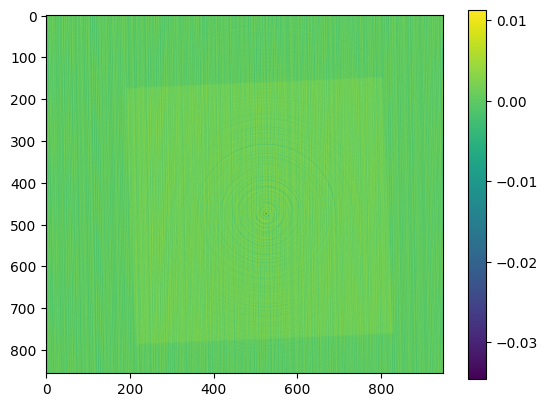

In [8]:
Z=100
slice=data[Z,:,:]
ShowImage(slice)

# Create streamable version

In [9]:
from openvisuspy.create_streamable import Streamable

# create streamable local version, where each 3d field will be an OpenVisus dataset
local_url = f"./remove-me/streamable/reconstructed_data/visus.nxs"

Streamable.Create(
    
    # original hdf5
    h5_filename, 

    # local streamable version
    local_url, 
    
    # arco
    arco="2mb", 

    # copmpression
    compression="zip", 

    # I need to predeclare what will be the options to open/read the binary data
    # I can choose later (by using `prefer` argument) which one to use 
    # {name} is the internal HDF5 expression to reach the data
    idx_urls={
    
    	# alias to a dic item that will be used for the `public`
    	"default": "remote",
    
    	# this is needed to generate internal local dtaset
        # ./remove-me/streamable/reconstructed_data/visus/{name}/visus.idx
    	"local": "./remove-me/streamable/reconstructed_data/visus/{name}/visus.idx",
    
    	# network s3 storage
        # e.g https://maritime.sealstorage.io/api/v0/s3/utah/streamable/hdf5/reconstructed_data/visus/{name}/visus.idx
    	"remote": "https://maritime.sealstorage.io/api/v0/s3/utah/streamable/hdf5/reconstructed_data/visus/{name}/visus.idx?cached=arco&access_key=any&secret_key=any&endpoint_url=https://maritime.sealstorage.io/api/v0/s3&cached=arco"
    }
)

DANGEROUS but needed: removing any old data file from ./remove-me/streamable/reconstructed_data/visus/shanks-3731-a/data/reconstructed_data/visus
Read data in 9.170136213302612 seconds shape=(676, 856, 949) dtype=float32 vmin=-0.08980203419923782 vmax=0.030067643150687218
Created IDX idx_url=[./remove-me/streamable/reconstructed_data/visus/shanks-3731-a/data/reconstructed_data/visus.idx] idx_axis=[x y z] idx_physic_box=[-0.77774 0.6253 -0.70078 0.56462 1.01602 2.01502]
Wrote IDX data in 17.33107018470764 seconds
Compressing dataset compression=zip...
Compressed dataset to zip in 16.087032794952393 seconds
Found already converted dataset, using the link /shanks-3731-a/reconstructed_data/data/reconstructed_data->/shanks-3731-a/data/reconstructed_data
new-size/old-size=83,912/1,847,736,861


# Show streamable version has exactly the same metadata

In [10]:
# I want to see any extra  metadata that H5Glance does not show
Streamable.Print(local_url)
# H5Glance(local_url)

 /
   @HDF5_Version=1.14.1
   @default=shanks-3731-a
   @file_name=/nfs/chess/user/rv43/user_examples/tomo/shanks-3731-a/ti-2-exsitu/reconstructed_data.nxs
   @file_time=2023-11-14T10:02:06.830431
   @h5py_version=3.9.0
   @nexusformat_version=1.0.2
   /shanks-3731-a
     @NX_class=NXentry
     @default=data
     /shanks-3731-a/bright_field_config shape='()' dtype='object'
     /shanks-3731-a/dark_field_config shape='()' dtype='object'
     /shanks-3731-a/data
       @NX_class=NXdata
       @axes=['z' 'y' 'x']
       @idx_url=https://maritime.sealstorage.io/api/v0/s3/utah/streamable/hdf5/reconstructed_data/visus/shanks-3731-a/data/reconstructed_data/visus.idx?cached=arco&access_key=any&secret_key=any&endpoint_url=https://maritime.sealstorage.io/api/v0/s3&cached=arco
       @idx_urls={'default': 'remote', 'local': './remove-me/streamable/reconstructed_data/visus/shanks-3731-a/data/reconstructed_data/visus.idx', 'remote': 'https://maritime.sealstorage.io/api/v0/s3/utah/streamable/hdf5/re

# Read  from local streamable (i.e. OpenVisus reads binary data)

ov.LoadDataset(./remove-me/streamable/reconstructed_data/visus/shanks-3731-a/data/reconstructed_data/visus.idx)
reconstructed_data
Adding field  reconstructed_data shape  [1, 676, 856, 949, 31] dtype  float32 labels  ['time', 'phony_dim_0', 'phony_dim_1', 'phony_dim_2', 'resolution'] Max Resolution  30
None
Got data type <class 'numpy.ndarray'> shape (338, 428, 475) dtype float32 min -0.050708987 max 0.030067643


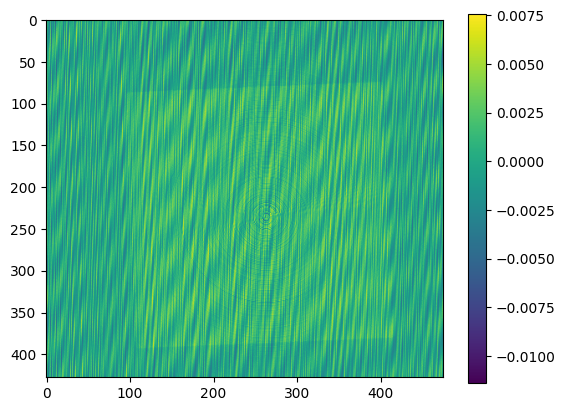

In [11]:
from openvisuspy.xarray_backend import OpenVisusBackendEntrypoint
ds = xr.open_dataset(
    local_url, 
    group=group, 

    # this is telling xarray to open binary data using OpenVisus
    engine=OpenVisusBackendEntrypoint, 

    # since I know I have data locally, I will open preferring local storage
    prefer="local"
)

field=ds[fieldname]
timestep,res=0,27
data=field[timestep,...,res].values
print("Got data","type",type(data),"shape",data.shape,"dtype",data.dtype,"min",np.min(data),"max",np.max(data))

Z=100
slice=data[Z,...]
ShowImage(slice)

#  (OPTIONAL SINCE ALREADY UPLOADED) Upload data to S3



In [12]:
do_upload=False
if do_upload:
  os.system(f'aws s3 sync --no-verify-ssl --endpoint-url "https://maritime.sealstorage.io/api/v0/s3" --profile sealstorage --size-only ./remove-me/streamable/reconstructed_data/ s3://utah/streamable/hdf5/reconstructed_data/')

# Read the data from S3

NOTE: the first time will be slow, the second will be a lot faster thanks to the cache

In [13]:
# I already have the file locally, but in case you need to get it
# NOTE directly opening the stream using f3fs is causing some problems with `xr.open_dataset` so I am saving the file locally first

from openvisuspy import DownloadObject
DownloadObject("s3://utah/streamable/hdf5/reconstructed_data/visus.nxs",local_url)

# cache will be filled here...
if not "VISUS_CACHE" in os.environ:
    os.environ["VISUS_CACHE"]="./remove-me/streamable/reconstructed_data/visus-cache"

ds=xr.open_dataset(
    local_url, 
    group=group, 
    engine=OpenVisusBackendEntrypoint, 
    # NOTE: this time I have the data remotely (and will cache it too!)
    prefer="remote"
)

field=ds[fieldname]
timestep,res=0,27
data=field[timestep,...,res].values
print("Got data","type",type(data),"shape",data.shape,"dtype",data.dtype,"min",np.min(data),"max",np.max(data))

ov.LoadDataset(https://maritime.sealstorage.io/api/v0/s3/utah/streamable/hdf5/reconstructed_data/visus/shanks-3731-a/data/reconstructed_data/visus.idx?cached=arco&access_key=any&secret_key=any&endpoint_url=https://maritime.sealstorage.io/api/v0/s3&cached=arco)
reconstructed_data
Adding field  reconstructed_data shape  [1, 676, 856, 949, 31] dtype  float32 labels  ['time', 'phony_dim_0', 'phony_dim_1', 'phony_dim_2', 'resolution'] Max Resolution  30
None
Got data type <class 'numpy.ndarray'> shape (338, 428, 475) dtype float32 min -0.050708987 max 0.030067643


# Show streamable data

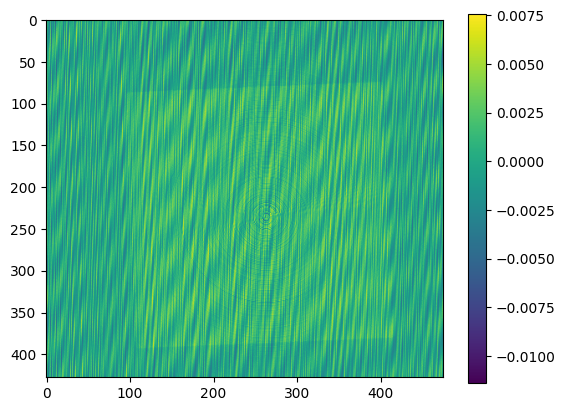

In [14]:
Z=100
slice=data[Z,...]
ShowImage(slice)